# **Regresión Lineal**

Vamos a tratar de predecir cuántos puntos ganará cada equipo en el campeonato. Primero importamos todas las librerías que usaremos y las instalamos en caso de ser necesario.

In [105]:
# Instalamos las librerías necesarias
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install sklearn
%pip install pickle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [106]:
# Importamos las librerías necesarias
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score
import pickle

El próximo paso es cargar los datos limpios.

In [107]:
datos = pd.read_csv('../data/overall_limpio.csv')
datos.head()

,Season,Rk,Squad,Country,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper
0,2022-2023,W,Manchester City,Inglaterra,13.0,8.0,5.0,0.0,32.0,5.0,27.0,29.0,"63,639",Erling Haaland-12,Ederson
1,2022-2023,F,Inter,Italia,13.0,7.0,3.0,3.0,19.0,11.0,8.0,24.0,"71,415",Edin Džeko-4,André Onana
2,2022-2023,SF,Real Madrid,España,12.0,8.0,2.0,2.0,26.0,13.0,13.0,26.0,"58,761",Vinicius Júnior-7,Thibaut Courtois
3,2022-2023,SF,Milan,Italia,12.0,5.0,3.0,4.0,15.0,11.0,4.0,18.0,"72,546",Olivier Giroud-5,Mike Maignan
4,2022-2023,QF,Bayern Munich,Alemania,10.0,8.0,1.0,1.0,22.0,6.0,16.0,25.0,"75,000","Leroy Sané,Eric Maxim Choupo-Moting-4",Yann Sommer


Observamos que hay algunas variables categóricas que podríamos pasar a numéricas, pues nos podrían ayudar en nuestra predicción posteriormente.

In [108]:
print(datos['Season'].unique())
print(datos['Rk'].unique())
print(datos['Squad'].unique())
print(datos['Country'].unique())

['2022-2023' '2021-2022' '2020-2021' '2019-2020' '2018-2019' '2017-2018'
 '2016-2017' '2015-2016' '2014-2015' '2013-2014' '2012-2013' '2011-2012'
 '2010-2011' '2009-2010' '2008-2009' '2007-2008' '2006-2007' '2005-2006'
 '2004-2005' '2003-2004']
['W' 'F' 'SF' 'QF' 'R16' 'GR']
['Manchester City' 'Inter' 'Real Madrid' 'Milan' 'Bayern Munich' 'Napoli'
 'Benfica' 'Chelsea' 'Liverpool' 'Paris S-G' 'Porto' 'RB Leipzig'
 'Dortmund' 'Tottenham' 'Club Brugge' 'Eint Frankfurt' 'Barcelona'
 'Sporting CP' 'Marseille' 'Shakhtar' 'RB Salzburg' 'Ajax'
 'Atlético Madrid' 'Leverkusen' 'Sevilla' 'Dinamo Zagreb' 'Juventus'
 'FC Copenhagen' 'Maccabi Haifa' 'Celtic' 'Viktoria Plzeň' 'Rangers'
 'Villarreal' 'Manchester Utd' 'Lille' 'Sheriff Tiraspol' 'Atalanta'
 'ruZen' 'Young Boys' 'Wolfsburg' 'Dynamo Kyiv' 'Malmö' 'Beşiktaş' 'Lazio'
 "M'Gladbach" 'Krasnodar' 'Loko Moscow' 'Olympiacos' 'Başakşehir'
 'Midtjylland' 'frRenn' 'Ferencváros' 'Lyon' 'Valencia' 'Red Star'
 'Slavia Prague' 'Galatasaray' 'Genk' 'Roma

Vemos que hay muchos equipos diferentes, así que no vale la pena convertir esta columna a numérica. Sin embargo, el resto de columas sí que vale la pena convertirlas a numéricas.

In [109]:
# Columna 'Season'
le = LabelEncoder().fit(datos['Season'])
datos['Season'] = le.transform(datos['Season'])

# Obtenemos los valores únicos originales
valores_originales = le.classes_
# Creamos un diccionario de mapeo para ver a qué valor numérico corresponde cada valor original
temporada = dict(zip(valores_originales, le.transform(valores_originales)))

print(temporada)

{'2003-2004': 0, '2004-2005': 1, '2005-2006': 2, '2006-2007': 3, '2007-2008': 4, '2008-2009': 5, '2009-2010': 6, '2010-2011': 7, '2011-2012': 8, '2012-2013': 9, '2013-2014': 10, '2014-2015': 11, '2015-2016': 12, '2016-2017': 13, '2017-2018': 14, '2018-2019': 15, '2019-2020': 16, '2020-2021': 17, '2021-2022': 18, '2022-2023': 19}


In [110]:
# Columna 'Rk'
le = LabelEncoder().fit(datos['Rk'])
datos['Rk'] = le.transform(datos['Rk'])

# Obtenemos los valores únicos originales
valores_originales = le.classes_
# Creamos un diccionario de mapeo para ver a qué valor numérico corresponde cada valor original
rankings = dict(zip(valores_originales, le.transform(valores_originales)))

print(rankings)

{'F': 0, 'GR': 1, 'QF': 2, 'R16': 3, 'SF': 4, 'W': 5}


In [111]:
# Columna 'Country'
le = LabelEncoder().fit(datos['Country'])
datos['Country'] = le.transform(datos['Country'])

# Obtenemos los valores únicos originales
valores_originales = le.classes_
# Creamos un diccionario de mapeo para ver a qué valor numérico corresponde cada valor original
paises = dict(zip(valores_originales, le.transform(valores_originales)))

print(paises)

{'Alemania': 0, 'Austria': 1, 'Azerbaiyán': 2, 'Bielorrusia': 3, 'Bulgaria': 4, 'Bélgica': 5, 'Chipre': 6, 'Croacia': 7, 'Dinamarca': 8, 'Escocia': 9, 'Eslovaquia': 10, 'Eslovenia': 11, 'España': 12, 'Francia': 13, 'Grecia': 14, 'Hungría': 15, 'Inglaterra': 16, 'Israel': 17, 'Italia': 18, 'Kazajistán': 19, 'Moldavia': 20, 'Noruega': 21, 'Países bajos': 22, 'Polonia': 23, 'Portugal': 24, 'República checa': 25, 'Rumanía': 26, 'Rusia': 27, 'Serbia': 28, 'Suecia': 29, 'Suiza': 30, 'Turquía': 31, 'Ucrania': 32}


Para ver con qué columnas hacemos la regresión, debemos mirar cuanta correlación hay entre ellas.

<AxesSubplot:>

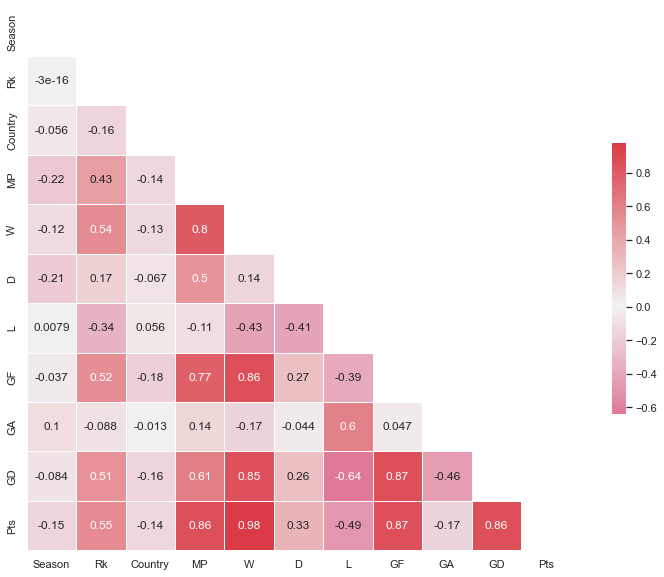

In [112]:
#Ahora vamos a hacer una matriz de correlaciones para ver que columnas están más correlacionadas con el precio
plt.figure(figsize=(15, 10))
sns.set(style='white')

mask=np.triu(np.ones_like(datos.corr(), dtype=bool))
cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(datos.corr(),
          mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5})

Podemos observar que la fila de puntos ('Pts') en la figura tiene correlación alta con 'GF' (goles a favor), 'GD' (diferencia de goles), 'W' (partidos ganados) y 'MP' (partidos jugados). Esto tiene sentido ya que cuantos más partidos jugados, mayor probabilidad de ganar puntos (además que si has jugado más partidos eso significa que has avanzado en el torneo y por lo tanto, ganado partidos). También es coherente que la columna de partidos ganados tenga alta correlación ya que el hecho de tener una victoria te suma puntos. Los goles a favor te ayudan a ganar el partido, así que la correlación con los puntos es alta, y la diferencia de goles es una variable linealmente dependiente a goles a favor, por lo que también está relacionada con los puntos. Nos deshacemos de estas columnas debido a que la alta correlación entre las características puede introducir multicolinealidad en el modelo, lo que puede dificultar la interpretación de los coeficientes y hacer que el modelo sea menos estable. También nos deshacemos de las columnas categóricas, pues no podremos hacer regresión lineal sobre ellas.

In [113]:
datos = datos.drop(columns=['Squad', 'MP', 'W', 'GF', 'GD', 'Attendance', 'Top Team Scorer', 'Goalkeeper'])
datos.head()

,Season,Rk,Country,D,L,GA,Pts
0,19,5,16,5.0,0.0,5.0,29.0
1,19,0,18,3.0,3.0,11.0,24.0
2,19,4,12,2.0,2.0,13.0,26.0
3,19,4,18,3.0,4.0,11.0,18.0
4,19,2,0,1.0,1.0,6.0,25.0


Ya comenzamos con nuestro modelo de regresión lineal, que tratará de predecir los puntos.

In [114]:
# Definimos nuestras variables x e y
x = datos.drop('Pts',axis=1)
y = datos['Pts']

# Dividimos los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalizamos los datos
pt = PowerTransformer()
pt.fit(x_train)
with open("../scalers/scalers.plk","wb") as f:
    pickle.dump(pt, f)

# Normalizamos lo que se asemeje a una distribución normal
x_train_scaled = pt.transform(x_train)
x_test_scaled = pt.transform(x_test)

y_train_scaled = np.log(y_train)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

x_train_scaled 

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Season,Rk,Country,D,L,GA
0,-1.888182,-0.705442,-1.173142,0.077826,-0.055873,-0.585402
1,-0.136667,1.540906,-0.327681,1.211699,-1.726670,-0.585402
2,1.257250,-0.705442,0.332626,0.690834,-0.843248,-0.585402
3,0.199908,-2.663514,-0.327681,1.669233,-1.726670,-0.294049
4,-1.103093,1.026883,0.332626,0.690834,-0.843248,-1.243860
...,...,...,...,...,...,...
443,1.257250,0.333566,-1.901681,0.077826,-0.055873,0.471326
444,1.115015,1.026883,0.117163,-0.685790,-0.055873,0.231748
445,0.361211,1.026883,0.117163,0.077826,0.667011,-0.022621
446,-0.496636,-0.705442,0.007818,0.077826,2.588530,2.337784


In [115]:
# Creamos el modelo de regresión lineal
lr = LinearRegression()
lr.fit(x_train_scaled,y_train_scaled)

# Hacemos las predicciones
y_pred = lr.predict(x_test_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Ahora vamos a calcular el R2
r2_score(y_test, np.exp(y_pred))

In [ ]:
# Histograma de los datos reales y los datos predichos
plt.figure(figsize=(20,20))
sns.histplot([np.exp(y_pred), y_test])
plt.legend()
plt.show()